<a href="https://colab.research.google.com/github/ParthDave111/Quant-and-Finance-File/blob/main/Understanding_Cooks_Distance_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
dates = pd.date_range('2023-01-01', '2023-12-31')
price_changes = np.random.normal(0, 1, len(dates))  # Simulated daily price changes
prices = 100 + np.cumsum(price_changes)  # Simulated stock prices starting at 100

In [ ]:
price_changes.shape

(365,)

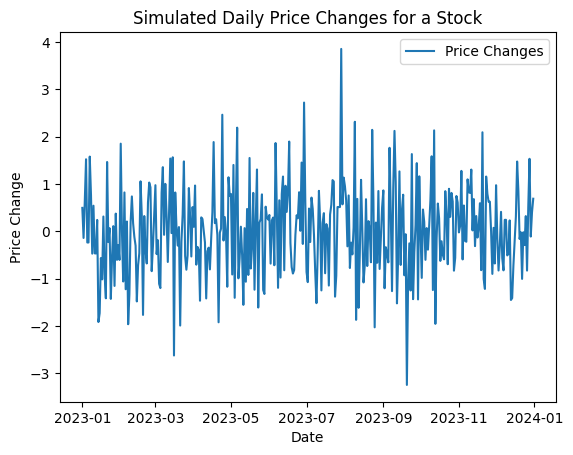

In [ ]:
# prompt: draw a diagram using price_changes

import matplotlib.pyplot as plt
plt.plot(dates, price_changes, label='Price Changes')
plt.xlabel('Date')
plt.ylabel('Price Change')
plt.title('Simulated Daily Price Changes for a Stock')
plt.legend()
plt.show()


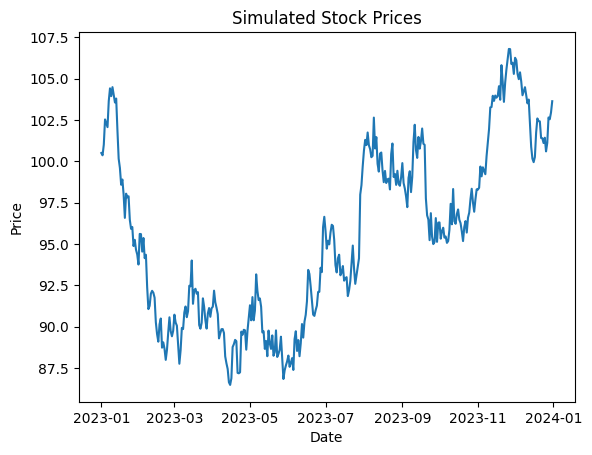

In [ ]:
# prompt: draw a diagram using prices

import matplotlib.pyplot as plt
plt.plot(dates, prices)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Simulated Stock Prices')
plt.show()


Z score

In [ ]:
data = prices

In [ ]:
def calculate_z_scores(data):
    mean = np.mean(data)
    std = np.std(data) # Indentation corrected to 8 spaces
    return (data - mean) / std

BOX PLOT

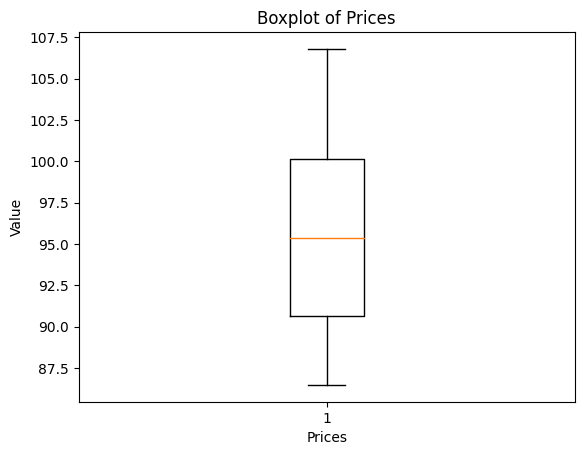

In [ ]:
# prompt: create a box plot on prices

import matplotlib.pyplot as plt
plt.boxplot(prices)
plt.xlabel("Price")
plt.ylabel("Value")
plt.title("Box Plot of Prices")
plt.show()


In [ ]:
data

array([100.49671415, 100.35844985, 101.00613839, 102.52916825,
       102.29501487, 102.06087791, 103.64009073, 104.40752546,
       103.93805107, 104.48061112, 104.01719342, 103.55146367,
       103.79342594, 101.8801457 , 100.15522787,  99.59294034,
        98.58010922,  98.89435655,  97.98633247,  96.57402877,
        98.03967754,  97.81390124,  97.88142944,  96.45668126,
        95.91229853,  96.02322112,  94.87222755,  95.24792556,
        94.64728687,  94.35559312,  93.75388651,  95.6061647 ,
        95.59266747,  94.53495654,  95.35750146,  94.13665781,
        94.3455214 ,  92.38585128,  91.05766523,  91.25452646,
        91.99299304,  92.16436132,  92.04871304,  91.74760935,
        90.26908736,  89.54924315,  89.08860438,  90.1457266 ,
        90.48934489,  88.72630474,  89.05038871,  88.66530643,
        87.98838443,  88.60006071,  89.63106024,  90.56234036,
        89.72312283,  89.41391046,  89.74517389,  90.72071902,
        90.24154478,  90.0558858 ,  88.94955083,  87.75

In [ ]:
# Add a few outliers to the data
data[10] = 200
data[20] = 50
data[30] = 150

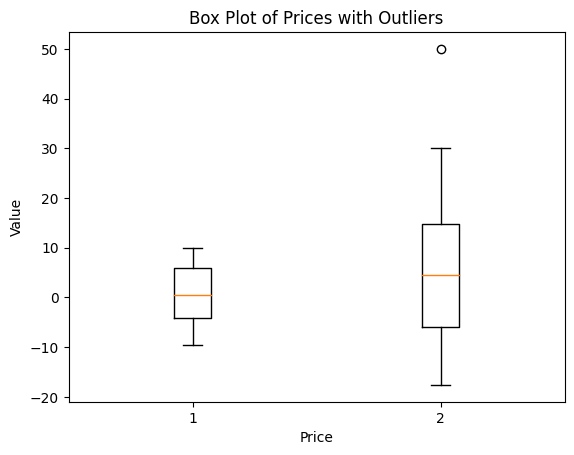

In [ ]:
# prompt: create the box plot with data

import matplotlib.pyplot as plt
plt.boxplot(data)
plt.xlabel("Price")
plt.ylabel("Value")
plt.title("Box Plot of Prices with Outliers")
plt.show()


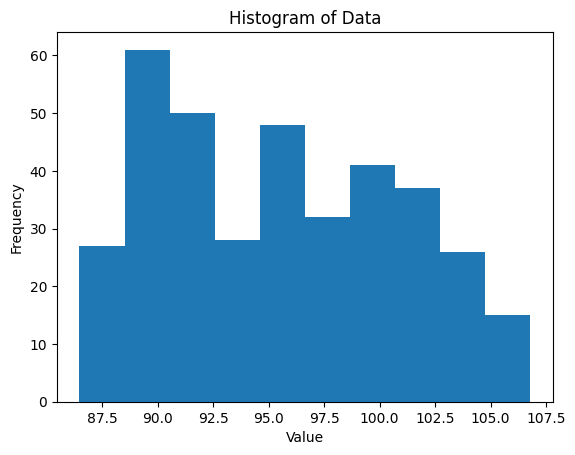

In [ ]:
# prompt: add few outlier in data

# Add a few outliers to the data
data[10] = 200
data[20] = 50
data[30] = 150

# Recalculate the z-scores
z_scores = calculate_z_scores(data)

# Print the new z-scores
print(z_scores)


In [ ]:
Q1 = np.quantile(data, 0.25)

NameError: name 'np' is not defined

In [ ]:
Q3 = np.quantile(data, 0.75)

In [ ]:
IQR = Q3 - Q1

In [ ]:
outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]


In [ ]:
outliers.shape

(3,)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(data['data'], np.zeros_like(data['data']), alpha=0.2, label='Prices')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
Value

NameError: name 'Value' is not defined

[*********************100%%**********************]  1 of 1 completed


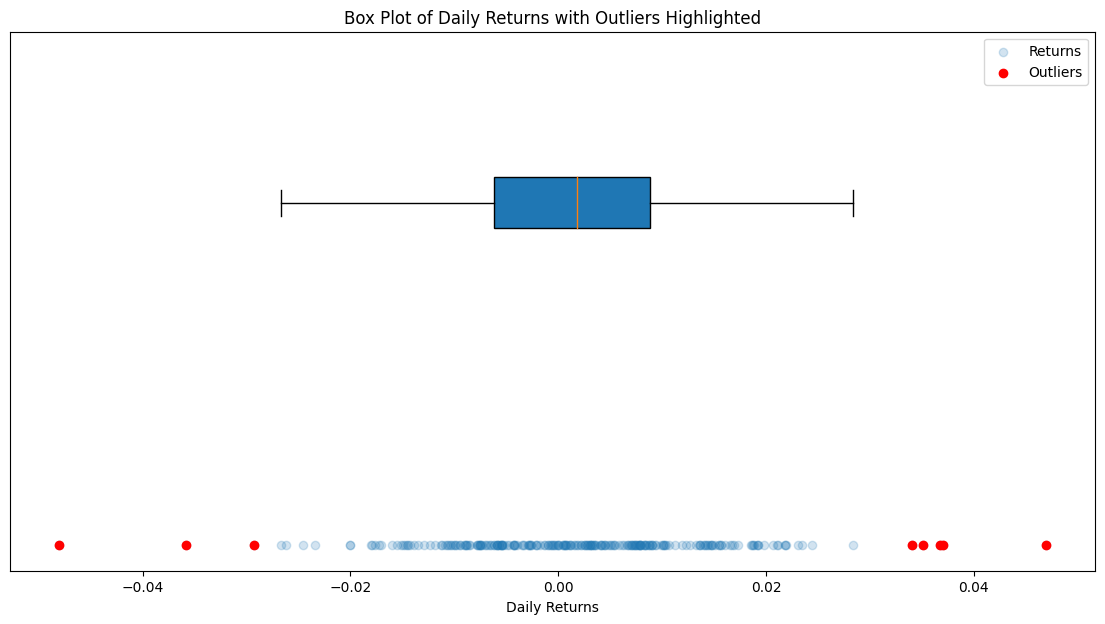

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Fetch historical price data
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end='2023-12-31')
data['Price'] = data['Close']

# Calculate daily returns
data['Returns'] = data['Price'].pct_change().dropna()

# Identify outliers using the IQR method
Q1 = data['Returns'].quantile(0.25)
Q3 = data['Returns'].quantile(0.75)
IQR = Q3 - Q1
outliers = data[(data['Returns'] < (Q1 - 1.5 * IQR)) | (data['Returns'] > (Q3 + 1.5 * IQR))]

# Plotting
plt.figure(figsize=(14, 7))

# Box plot
plt.boxplot(data['Returns'].dropna(), vert=False, patch_artist=True, showfliers=False)

# Plot all returns
plt.scatter(data['Returns'], np.zeros_like(data['Returns']), alpha=0.2, label='Returns')

# Highlight outliers
plt.scatter(outliers['Returns'], np.zeros_like(outliers['Returns']), color='red', label='Outliers')

# Customizing the plot
plt.title('Box Plot of Daily Returns with Outliers Highlighted')
plt.xlabel('Daily Returns')
plt.yticks([])  # Remove y-axis ticks
plt.legend()
plt.show()


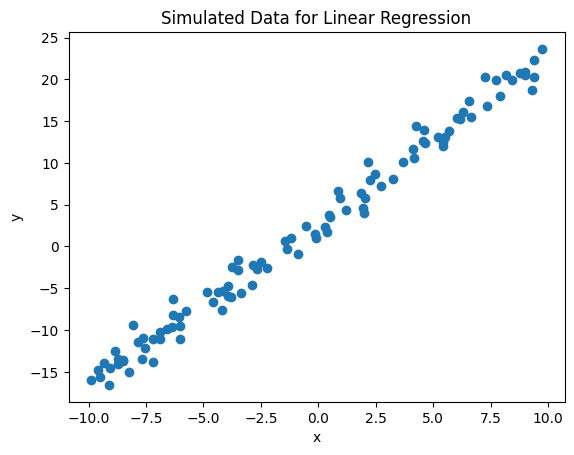

In [ ]:
# prompt: create simulated data set for linear regression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

# Generate random data for linear regression
n_samples = 100
x = np.random.uniform(low=-10, high=10, size=n_samples)
y = 2 * x + 3 + np.random.normal(scale=1.5, size=n_samples)

# Create a DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Plot the data
plt.scatter(data['x'], data['y'])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Data for Linear Regression')
plt.show()


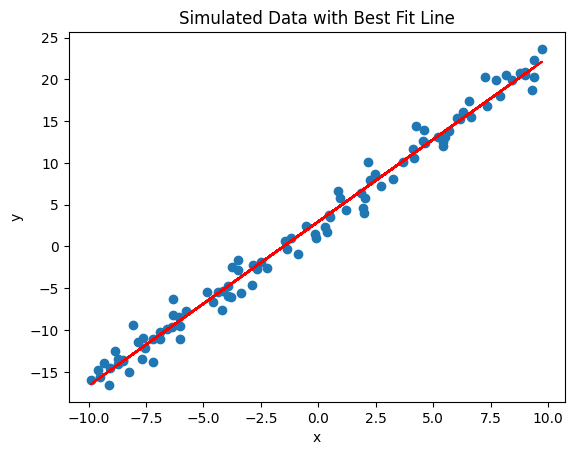

In [ ]:
# prompt: create a best fit line in the plot

import matplotlib.pyplot as plt
import numpy as np
# Calculate the best fit line using linear regression
model = np.polyfit(data['x'], data['y'], 1)
predicted_y = np.polyval(model, data['x'])

# Plot the data and the best fit line
plt.scatter(data['x'], data['y'])
plt.plot(data['x'], predicted_y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Data with Best Fit Line')
plt.show()


In [ ]:
x.shape

(100,)

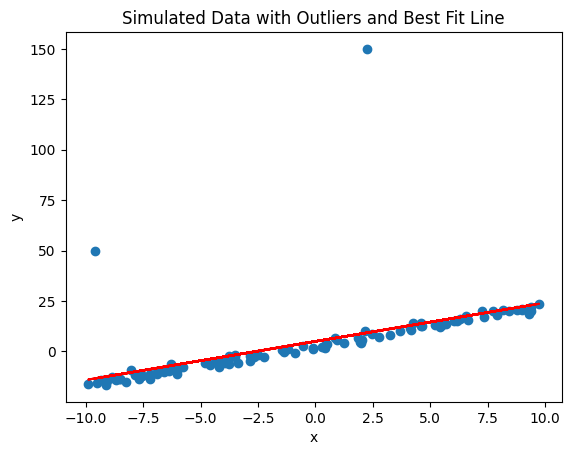

In [ ]:
# prompt: add some outlier in the data

import matplotlib.pyplot as plt
import numpy as np
# Add some outliers to the data
data.loc[10, 'y'] = 50

# Recalculate the best fit line using linear regression
model = np.polyfit(data['x'], data['y'], 1)
predicted_y = np.polyval(model, data['x'])

# Plot the data and the best fit line
plt.scatter(data['x'], data['y'])
plt.plot(data['x'], predicted_y, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Data with Outliers and Best Fit Line')
plt.show()


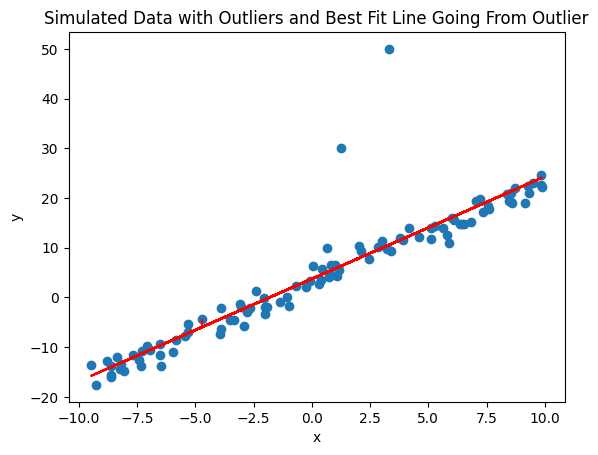

In [ ]:
# prompt: draw a best fit line going from outlier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate random data for linear regression
n_samples = 100
x = np.random.uniform(low=-10, high=10, size=n_samples)
y = 2 * x + 3 + np.random.normal(scale=1.5, size=n_samples)

# Create a DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Add an outlier
data.loc[10, 'y'] = 10
data.loc[20, 'y'] = 30
data.loc[30, 'y'] = 50

# Calculate the best fit line using linear regression
model = np.polyfit(data['x'], data['y'], 1)
predicted_y = np.polyval(model, data['x'])

# Draw a best fit line going from outlier
outlier_x = data.loc[10, 'x']
outlier_y = data.loc[10, 'y']
outlier_x = data.loc[30, 'x']
outlier_y = data.loc[30, 'y']
outlier_x = data.loc[50, 'x']
outlier_y = data.loc[50, 'y']
predicted_y_outlier = model[0] * outlier_x + model[1]

plt.scatter(data['x'], data['y'])
plt.plot(data['x'], predicted_y, color='red')
plt.plot([outlier_x, outlier_x], [outlier_y, predicted_y_outlier], color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Simulated Data with Outliers and Best Fit Line Going From Outlier')
plt.show()


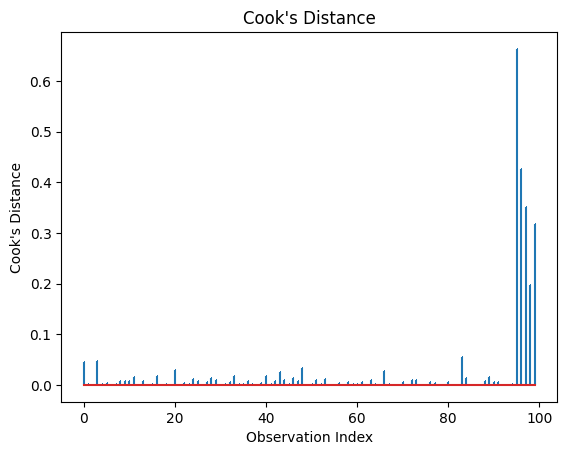

Influential points: [ 0  3 83 95 96 97 98 99]
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     1403.
Date:                Thu, 06 Jun 2024   Prob (F-statistic):           1.12e-56
Time:                        12:20:23   Log-Likelihood:                -65.985
No. Observations:                  92   AIC:                             136.0
Df Residuals:                      90   BIC:                             141.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Interc

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Sample data
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = 2 * X + np.random.normal(0, 0.5, 100)
# Adding some outliers
X[95:] += 5
Y[95:] += 5

# Create a DataFrame
data = pd.DataFrame({'X': X, 'Y': Y})

# Fit the initial regression model
model = smf.ols('Y ~ X', data=data).fit()

# Calculate Cook's distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# Plot Cook's distance
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.show()

# Define a threshold for Cook's distance
# A common threshold is 4 / n where n is the number of observations
threshold = 4 / len(data)

# Identify influential points
influential_points = np.where(cooks_d > threshold)[0]

print(f"Influential points: {influential_points}")

# Remove influential points
data_cleaned = data.drop(index=influential_points)

# Refit the model without influential points
model_cleaned = smf.ols('Y ~ X', data=data_cleaned).fit()

# Summary of the new model
print(model_cleaned.summary())
